# Introductory applied machine learning
# Assignment 1

## Important Instructions
#### <span style="color:blue">SUBMISSION INSTRUCTIONS WILL BE REALEASED SHORTLY</span>

**It is important that you carefully follow the instructions below for things to work properly.**

1. You need to have your environment set up as in the [README](https://github.com/amosstorkey/iaml-labs) and you need to activate this environment before running this notebook:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer.

### SUBMISSION Mechanics

This assignment is formative and such will not count towards your final grade. Nonetheless, we ask you to submit answers to certain questions so that you can become familiar with the Gradescope system and so that we can summarize common mistakes people might make.

We will be using [Gradescope](https://www.gradescope.com/) for submissions. Submission instructions will be released separately shortly. You will be using a separate Latex-based file where you would copy your answers and/or code.

**IMPORTANT: Only specific questions need to be submitted. These are Question 2.2, Question 2.6, Question 4.3 and Question 4.4,**

The submission deadline for this assignment by **Monday 14/10/2019 at 16:00**. 

Since this assignment is formative, there will be no marking assigned.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

/afs/inf.ed.ac.uk/user/s18/s1891075/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


# Question 1
## 20 Newsgroup Dataset 

### Description of the dataset

This question is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [2]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path)
news_raw.info()
news_raw.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


(2) ***Your answer goes here:***

The dataset includes 2129 data, each of them belong to one of the 5 classes and each of data have 520 attributes. Attributes are the frequency of word in that news.

### ========== Question 1.2 ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [3]:
# (1) # Your Code goes here:
print(news_raw.columns)
print(type(news_raw.columns))

Index(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens', 'w6_dwyer',
       'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home',
       ...
       'w512_constantly', 'w513_generate', 'w514_definite', 'w515_lacks',
       'w516_combination', 'w517_sitting', 'w518_surface', 'w519_fashion',
       'w520_sit', 'class'],
      dtype='object', length=521)
<class 'pandas.core.indexes.base.Index'>


(2) ***Your answer goes here:***

The names are stored in a Index object, and are type 'object'. 521 columns in total, apart from 'class' 520 attributes in total.

# Question 2
## Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.21/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [4]:
# Your Code goes here:
train_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
test_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')

news_train = pd.read_csv(train_path)
news_test = pd.read_csv(test_path)

print(news_train.describe())
news_test.describe()

            w1_aaa      w2_pins       w3_kmr    w4_notion    w5_queens  \
count  2099.000000  2099.000000  2099.000000  2099.000000  2099.000000   
mean      1.025727     1.017627     1.014769     1.008576     1.006193   
std       0.280109     0.205208     0.172657     0.115206     0.078473   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       8.000000     7.000000     5.000000     4.000000     2.000000   

          w6_dwyer  w7_defenseman       w8_gld   w9_tocchet     w10_home  \
count  2099.000000    2099.000000  2099.000000  2099.000000  2099.000000   
mean      1.010481       1.026203     1.024297     1.012387     1.084326   
std       0.134174       0.618880     0.274219     0.153879     0.491139   
min       1.000000       1.00

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 2.2 ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***
1. Answer:
    1. Each data in datasets is identically independent distributed.
    2. Attributes are conditionally independent.
2. Answer:
    - If we don't make the first assumption, each data have different distrubution or datas are dependent on others we can't calculate the post probability of attributes, because they are dependent on the specific data sample now. Can't be used on all datas.
    - If we don't make the second assumption, the post probabity $P(\textbf{x}\mid y)$ is very hard to find, because when dimension is too high it's very hard to find every possible $\{x_1, x_2, \dots ,x_n\}$ for every $y_i$. So with the assumption 2 we can easily compute $P(\textbf{x}\mid y)$ by mutiply $P(x_i\mid y)$, rather than the chain rule $P(\textbf{x}\mid y) = \prod_{i=1}^{d} P(x_i\mid x_1, \dots, x_{i-1}, y)$. And we can't ignore attribudes when we missing values of that attribute.

### ========== Question 2.3 ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

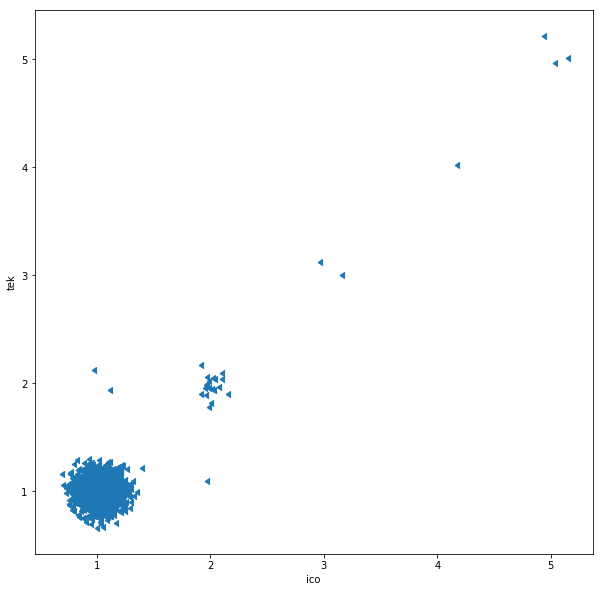

In [5]:
# (1) # Your Code goes here:
plt.figure(figsize=(10, 10))
plt.xlabel('ico')
plt.ylabel('tek')
scatter_jitter(news_train['w281_ico'], news_train['w273_tek'], jitter=0.5)

(2) ***Your answer goes here:***

    This two feature are highly linearity, they are not fit the independence assumption. Because their correlation is too high

### ========== Question 2.4 ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***

    We can classify all data to the most frequent class as the baseline.

In [6]:
# (2) # Your Code goes here:
all = news_train.shape[0]
n1 = news_train[news_train["class"] == 1].shape[0]
n2 = news_train[news_train["class"] == 2].shape[0]
n3 = news_train[news_train["class"] == 3].shape[0]
n4 = news_train[news_train["class"] == 4].shape[0]
n5 = news_train[news_train["class"] == 5].shape[0]

baceline_accur = max(n1, n2, n3, n4, n5) / all
print("Estimated accuracy:", baceline_accur)
print(n1, n2, n3, n4, n5)

Estimated accuracy: 0.21295855169128156
363 421 422 447 446


<a id='question_2_5'></a>
### ========== Question 2.5 ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [7]:
# (1) # Your Code goes here:
X = news_train.drop('class', axis=1, inplace=False)
Y = news_train['class']
gnb = GaussianNB()
gnb.fit(X, Y)

GaussianNB(priors=None)

0.8780371605526441

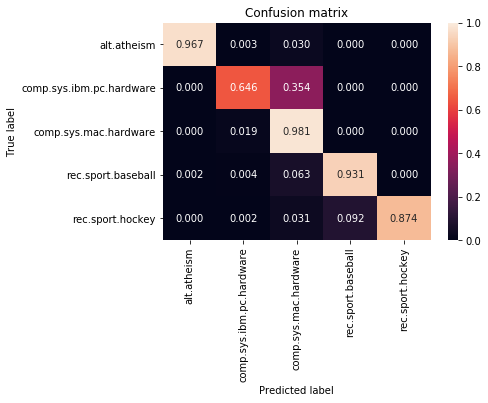

In [8]:
# (2) # Your Code goes here:
labels = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.sport.baseball', 'rec.sport.hockey']
train_pred = gnb.predict(X)
cm = confusion_matrix(y_true=Y, y_pred=train_pred)
plot_confusion_matrix(cm, labels)
acc_train = (np.sum(np.diag(cm)) / np.sum(cm))
acc_train

(3) ***Your answer goes here:***

    The overall accuracy is not a good metric, because it has very different acccuracy on different classes. Using precission on each class is more reasonable. And because the data amount are biased, so the class has fewer datas has lower accuraacy but the overall accuracy is high.

### ========== Question 2.6 ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***

    Many 'PC's are classfied to mac and many 'hockey's are classified to 'baseball', which fit the expectation because 'PC' and 'mac' are similiar topics and so does 'hockey' and 'baseball'. And because the 'mac' datas are more than 'PC's, so the missclassifications don't affect 'mac' accuracy' so much but affect 'PC' a lot.

### ========== Question 2.7 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

0.8203125

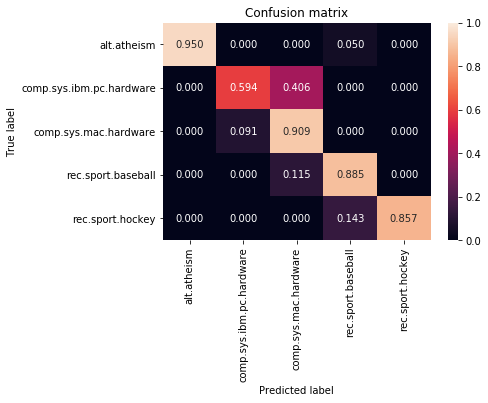

In [9]:
# (1) # Your Code goes here:
X_test = news_test.drop('class', axis=1, inplace=False)
Y_test = news_test['class']

Y_pred = gnb.predict(X_test)
cm_test = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
plot_confusion_matrix(cm_test, labels)
acc_test = (np.sum(np.diag(cm_test)) / np.sum(cm_test))
acc_test

In [62]:
# (2) # Your Code goes here:
all_test = news_test.shape[0]
n1 = news_test[news_test["class"] == 1].shape[0]
n2 = news_test[news_test["class"] == 2].shape[0]
n3 = news_test[news_test["class"] == 3].shape[0]
n4 = news_test[news_test["class"] == 4].shape[0]
n5 = news_test[news_test["class"] == 5].shape[0]

baceline_gen_accur = max(n1, n2, n3, n4, n5) / all_test
print("Estimated accuracy:", baceline_gen_accur)
print(n1, n2, n3, n4, n5)

Estimated accuracy: 0.25
20 32 22 26 28


##### (3) ***Your answer goes here:***

    The accuracy of baseline is almost 0.25, and for the training set is 0.8203125, is higher than baseline so the classifier is effective

### ========== Question 2.8 ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

0.171875
0.21324565523720057
368 427 427 454 453
5 6 5 7 7


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
123,106,583,395,336,309,505,238,361,140,469,...,329,213,296,305,331,541,398,444,200,5
159,211,561,565,277,181,418,165,216,528,331,...,536,540,177,216,526,218,459,356,284,2
196,207,115,166,455,365,436,305,536,232,274,...,248,318,235,335,377,231,225,458,251,5
222,428,227,245,463,426,468,164,510,315,154,...,161,240,203,163,436,410,289,380,576,4
242,318,543,379,543,286,207,305,475,458,123,...,180,203,263,227,429,123,339,309,417,1
476,115,549,558,200,553,229,346,281,355,253,...,438,456,282,508,107,417,140,600,370,5
539,527,191,579,331,474,203,539,591,265,448,...,382,340,371,411,337,572,131,399,325,4
559,299,516,128,439,369,201,529,524,439,426,...,406,170,186,486,505,599,374,296,590,4
576,177,258,101,229,258,347,527,572,395,353,...,480,108,536,247,187,503,174,424,360,2
594,431,161,554,309,447,582,250,510,574,419,...,469,587,313,163,488,105,295,210,450,3


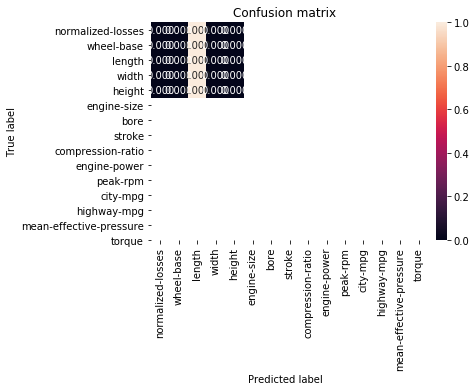

In [63]:
# (1) # Your Code goes here:
X_raw = news_raw.drop('class', axis=1, inplace=False)
Y_raw = news_raw['class']
gnb = GaussianNB()
gnb.fit(X_raw, Y_raw)
test_pred_raw = gnb.predict(X_test)
cm_raw = confusion_matrix(y_true=Y_test, y_pred=test_pred_raw)
plot_confusion_matrix(cm_raw, labels)
acc_raw = np.sum(np.diag(cm_raw)) / np.sum(cm_raw)
print(acc_raw)

all_raw = news_raw.shape[0]
n1 = news_raw[news_raw["class"] == 1].shape[0]
n2 = news_raw[news_raw["class"] == 2].shape[0]
n3 = news_raw[news_raw["class"] == 3].shape[0]
n4 = news_raw[news_raw["class"] == 4].shape[0]
n5 = news_raw[news_raw["class"] == 5].shape[0]

baseline_raw_accur = max(n1, n2, n3, n4, n5) / all_raw
print(baseline_raw_accur)
print(n1, n2, n3, n4, n5)
pd.options.display.max_rows = 999
outliers = news_raw[news_raw["w1_aaa"] > 100]

all_outliers = news_raw.shape[0]
n1 = outliers[outliers["class"] == 1].shape[0]
n2 = outliers[outliers["class"] == 2].shape[0]
n3 = outliers[outliers["class"] == 3].shape[0]
n4 = outliers[outliers["class"] == 4].shape[0]
n5 = outliers[outliers["class"] == 5].shape[0]

pd.options.display.max_columns = 20

print(n1, n2, n3, n4, n5)
outliers

(2) ***Your answer goes here:***

    Almost all datas have been classified as class 3.
    There are 30 oytliers in the raw dataset. Because they have too large datas, they disturb the Gaussian distribution so much, remove them is effective to improbe classifier perfoemance.

### ========== Question 2.9 ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***

    I will use the Multinomial naive Bayes. Because news have different length of them, with different length the number of that word varies, the news have extrem value will highly disturb Gaussian distribution, because the Gaussian is evaluate the probability by specific number of each word occured in one news. Using multinomial we don't care how many words occured but only depend on whether the word exists.

<a id='question_3'></a>
# Question 3
## Automobile Pricing Dataset

### Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_3_1'></a>
### ========== Question 3.1 ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [12]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path)
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


(2) ***Your answer goes here:***

### ========== Question 3.2 ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

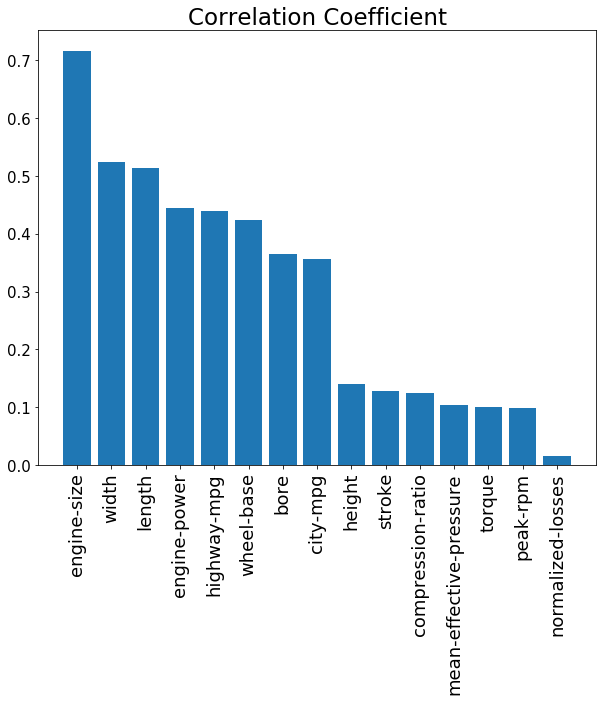

Index(['engine-size', 'width', 'length', 'engine-power', 'highway-mpg',
       'wheel-base', 'bore', 'city-mpg', 'height', 'stroke',
       'compression-ratio', 'mean-effective-pressure', 'torque', 'peak-rpm',
       'normalized-losses'],
      dtype='object')

In [54]:
# (1) # Your Code goes here:
mean = auto_numeric.describe().loc["mean"].values
std = auto_numeric.describe().loc["std"].values
auto_min_mean = auto_numeric.values - mean
prices_m = auto_min_mean[:, -1]
attr_m = auto_min_mean[:, 0:-1]
coe = prices_m.T @ auto_min_mean
sig = (std.reshape(std.shape[0], 1) @ std.reshape(1,std.shape[0]))[-1, :]
coe = (coe / sig / 158)[:-1]

coe_df = pd.DataFrame(columns=auto_numeric.columns[:-1])
coe_df.loc[0] = np.absolute(coe)
coe_df.sort_values(by=0, axis=1, ascending=False, inplace=True)

x = range(15)
plt.figure(figsize=(10, 8))
plt.bar(x, height=coe_df.iloc[0])
plt.xticks(x, coe_df.columns, rotation='vertical', size=18)
plt.title("Correlation Coefficient", size=(23))
plt.yticks(size=15)
plt.show()

coe_df.columns


(2) ***Your answer goes here:***

    The attributes with highest absolute correlation coefficient, they are 'engine-size', 'width', 'length', 'engine-power', 'highway-mpg', 'wheel-base' and 'bore'.

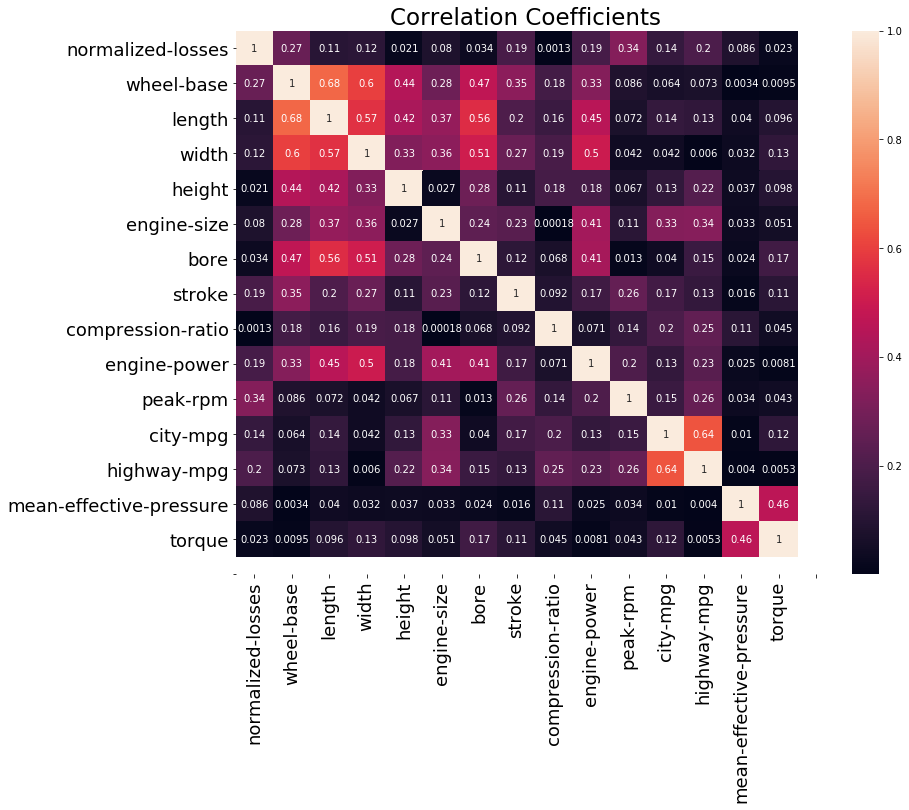

In [65]:
# (3) # Your Code goes here:
coe = auto_min_mean.T @ auto_min_mean
sig = (std.reshape(std.shape[0], 1) @ std.reshape(1,std.shape[0]))
coe = coe / sig / 158
plt.figure(figsize=(13, 10))

labels = auto_numeric.columns.values[:-1]
sns.heatmap(np.absolute(coe[:-1, :-1]), annot=True)
x = np.arange(16) + 0.5
plt.xticks(x, labels, rotation='vertical', size=18)
plt.yticks(x, labels, rotation="horizontal", size=18)
plt.title("Correlation Coefficients", size=23)
plt.show()

(4) ***Your answer goes here:***

    Such like "length" and "wheel-base" and "width", "city-mpg" and "highway-mpg" are corelated to each other.

(5) ***Your answer goes here:***

    I will remove "length", "engin-power" and "wheel-base". Because the "length" and "wheel-base" are corelate to "width", the "engin-power" is relate to "engin_size".


# Question 4
## Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.21/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. In this question we will perform K-fold cross-validation using scikit's *KFold* class.**

<a id='question_4_1'></a>
### ========== Question 4.1  ==========

K-fold cross-validation.

1. [Text] What other technique for validation could we use (rather than K-Fold cross-validation)?

1. [Text] Given the analysis you did on the automobile dataset in [Question 3](#question_3), what problem are we trying to solve by using K-Fold cross-validation?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*


(1) ***Your answer goes here:***

    Such as leave-one-out, stratification and significance.

(2) ***Your answer goes here:***

    We are trying to evaluate the effecient of the classifier.

In [141]:
# (3) # Your Code goes here:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

### ========== Question 4.1  ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 3.1](#question_3_1), and evaluate it using the *KFold* instance you created in [Question 4.1](#question_4_1) (report RMSE and $R^2$). 

In [142]:
# (1) # Your Code goes here:
X_all = auto_numeric.drop("price", axis=1, inplace=False)
y_all = auto_numeric["price"]

k = 1
RMSE_sum = 0
r2_sum = 0
for train_index, test_index in kf.split(auto_numeric):
    X_train = X_all.iloc[train_index]
    y_train = y_all.iloc[train_index]
    X_test = X_all.iloc[test_index]
    y_test = y_all.iloc[test_index]
    
    lr = LinearRegression().fit(X=X_train, y=y_train)
    
    y_pred = lr.predict(X_test)
    
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(str(k) + "th-fold: ")
    print("RMSE:\t", RMSE)
    print("R2: \t", r2)
    print("--------------------------------------")
    k += 1
    RMSE_sum += RMSE
    r2_sum += r2

print("Mean RMSE: \t", RMSE_sum / 5)
print("Mean R2: \t", r2_sum / 5)

1th-fold: 
RMSE:	 4967.167784156624
R2: 	 0.458255718229054
--------------------------------------
2th-fold: 
RMSE:	 3639.796941823499
R2: 	 0.459983239561501
--------------------------------------
3th-fold: 
RMSE:	 3783.312099711999
R2: 	 0.7483723510294327
--------------------------------------
4th-fold: 
RMSE:	 3872.5799159789713
R2: 	 0.5916686083150735
--------------------------------------
5th-fold: 
RMSE:	 7053.376375844182
R2: 	 0.1977829166641667
--------------------------------------
Mean RMSE: 	 4663.246623503055
Mean R2: 	 0.4912125667598456


### ========== Question 4.2 ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

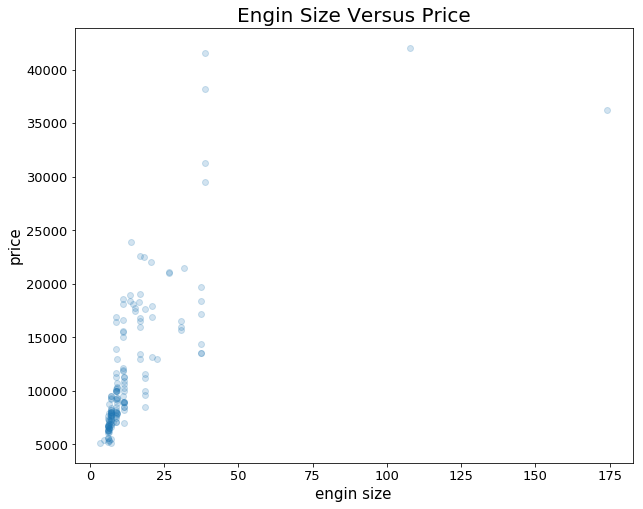

In [143]:
# (1) # Your Code goes here:
plt.figure(figsize=(10, 8))
plt.scatter(x=auto_numeric["engine-size"], y=auto_numeric["price"], alpha=0.2)
plt.xlabel("engin size", size=15)
plt.ylabel("price", size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Engin Size Versus Price", size=20)
plt.show()

(2) ***Your answer goes here:***

    The engin size has high correlationship with price, but it is not linear with price. We can see within the begining interval the size is positive linear with price, but after that interval the price don't change among engin size varies.

<a id='question_4_3'></a>
### ========== Question 4.3 ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

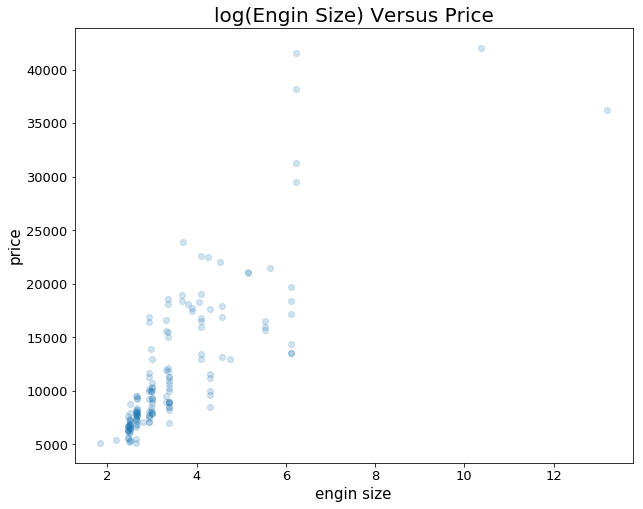

In [144]:
# (1) # Your Code goes here:
X_all_transformed = X_all
X_all_transformed["engine-size"] = np.sqrt(X_all["engine-size"].values)

plt.figure(figsize=(10, 8))
plt.scatter(x=X_all_transformed["engine-size"], y=y_all, alpha=0.2)
plt.xlabel("engin size", size=15)
plt.ylabel("price", size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("log(Engin Size) Versus Price", size=20)
plt.show()

In [145]:
# (2) # Your Code goes here:
RMSE_sum = 0
r2_sum = 0
k = 1
for train_index, test_index in kf.split(auto_numeric):
    X_train = X_all_transformed.iloc[train_index]
    y_train = y_all.iloc[train_index]
    X_test = X_all_transformed.iloc[test_index]
    y_test = y_all.iloc[test_index]
    
    lr = LinearRegression().fit(X=X_train, y=y_train)
    
    y_pred = lr.predict(X_test)
    
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(str(k) + "th-fold: ")
    print("RMSE:\t", RMSE)
    print("R2: \t", r2)
    print("--------------------------------------")
    RMSE_sum += RMSE
    r2_sum += r2
    k += 1
    
print("Mean RMSE: \t", RMSE_sum / 5)
print("Mean R2: \t", r2_sum / 5)

1th-fold: 
RMSE:	 4181.075649724213
R2: 	 0.6161577939492278
--------------------------------------
2th-fold: 
RMSE:	 3419.35257923143
R2: 	 0.5234146408440306
--------------------------------------
3th-fold: 
RMSE:	 3370.0067441014908
R2: 	 0.8003471283450114
--------------------------------------
4th-fold: 
RMSE:	 3304.136636342115
R2: 	 0.7027458078085754
--------------------------------------
5th-fold: 
RMSE:	 4678.619685373187
R2: 	 0.6470336727891136
--------------------------------------
Mean RMSE: 	 3790.638258954487
Mean R2: 	 0.6579398087471918


(3) ***Your answer goes here:***

    I applied square root function to engin size. The average RMSE reduced 872.6083645485683 and R2 incresed 0.16672724198734623. Because the engin size is the most related attribute with price (has highest correlation coefficient), so the change is significant.

### ========== Question 4.4 ==========

#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 4.3](#question_4_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [148]:
# (2) # Your Code goes here:


(3) ***Your answer goes here:***

    

### ========== Question 4.5 ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 4.3](#question_4_3).

(1) ***Your answer goes here:***

In [21]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***